In [1]:
pip install facenet_pytorch

     |████████████████████████████████| 1.9 MB 5.2 MB/s 


In [2]:
pip install xlsxwriter

     |████████████████████████████████| 149 kB 5.2 MB/s 


In [3]:
from facenet_pytorch import MTCNN as facenet_mtcnn
import torch
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import load_model
import xlsxwriter
from datetime import date
import pandas as pd
from zipfile import ZipFile


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Using Google Colab
path_to_zip_file = '/content/drive/MyDrive/Thesis/LFW_train.zip'### give path here
with ZipFile(path_to_zip_file, 'r') as zf:
  zf.extractall()

In [6]:
#Using Google Colab
path_to_zip_file = '/content/drive/MyDrive/Thesis/MLFW_test.zip'### give path here
with ZipFile(path_to_zip_file, 'r') as zf:
  zf.extractall()

In [7]:
#Using Google Colab
path_to_zip_file = '/content/drive/MyDrive/Thesis/Multiple.zip'### give path here
with ZipFile(path_to_zip_file, 'r') as zf:
  zf.extractall()

In [23]:
#Using Google Colab
path_to_zip_file = '/content/drive/MyDrive/Thesis/facenet-keras.zip'### give path here
with ZipFile(path_to_zip_file, 'r') as zf:
  zf.extractall()

In [8]:
train_fast_mtcnn = facenet_mtcnn(min_face_size = 120,device=device)
test_fast_mtcnn = facenet_mtcnn(margin = 14,factor = 0.6,min_face_size = 40,keep_all = True,device=device)

In [9]:
# draw an image with detected objects
def draw_facebox(filename,image_type):
# load the image
    data = plt.imread(filename)
# plot the image
    plt.imshow(data)
    if image_type == 'train':
        result_list = train_fast_mtcnn.detect(data)
    else:
        result_list = test_fast_mtcnn.detect(data)
# get the context for drawing boxes
    ax = plt.gca()
# plot each box
    for result in result_list[0]:
# get coordinates
        x, y, width, height = result
        width = width - x
        height = height - y
# create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
        ax.add_patch(rect)
# show the plot
    plt.show()

Train Image


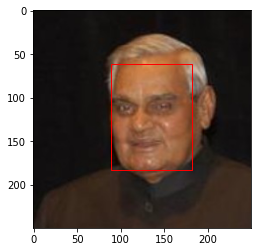

In [11]:
print('Train Image')
#draw_facebox('../input/lfw-train/LFW_train/Class 10/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0001.jpg',image_type = 'train')
draw_facebox('/content/LFW_train/Class 10/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0001.jpg',image_type = 'train')

Test Image


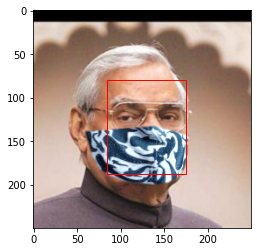

In [12]:
print('Test Image')
#draw_facebox('../input/mlfw-test/MLFW_test/Class 10/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0002_0000.jpg',image_type = 'test')
draw_facebox('/content/MLFW_test/Class 10/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0002_0000.jpg',image_type = 'test')

In [13]:
def extract_face(filename,image_type,required_size=(160, 160)):
    img = plt.imread(filename)
    if image_type == 'train':
        faces = train_fast_mtcnn.detect(img)
    else:
        faces = test_fast_mtcnn.detect(img)
    face_list = []
    try:
        for result in faces[0]:
            x, y, width, height = result
            if x < 0 or y < 0:
                continue
            x1 ,y1 = math.floor(x), math.floor(y)
            x2, y2 = math.floor(width), math.floor(height)
            fa = img[y1:y2, x1:x2]
            image = Image.fromarray(fa)
            image = image.resize(required_size)
            temp = np.asarray(image)
            face_list.append(temp)
            face_array = np.asarray(face_list)
        return face_array
    except:
        print('No faces detected',filename)
        return 'empty'

In [14]:
def load_dataset(dir,image_type):
    # list for faces and labels
    X, y = list(), list()
    no_files = 0
    no_face = 0
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        ls = len(path)
        for filename in os.listdir(path):
            total_files = len(os.listdir(path))
            no_files += 1
            file_path = path + filename
            faces = extract_face(file_path,image_type)
            if faces == 'empty':
                no_face += 1
                continue
            labels = [subdir for i in range(len(faces))]
            X.extend(faces)
            y.extend(labels)
        print('Total number of Samples for %s is %d' % (subdir,total_files))
    print('Total number of Faces Identified',len(y))
    print('Total Number of Files',no_files)
    print('Total Number of Files with no faces detected',no_face)
    return np.asarray(X), np.asarray(y)

In [15]:
#trainX, trainy = load_dataset('../input/lfw-train/LFW_train/Class 10/',image_type = 'train')
trainX, trainy = load_dataset('/content/LFW_train/Class 10/',image_type = 'train')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


Total number of Samples for Nicole_Kidman is 19
Total number of Samples for Lucio_Gutierrez is 13
Total number of Samples for Winona_Ryder is 24
Total number of Samples for Jean_Charest is 17
Total number of Samples for Tom_Ridge is 33
Total number of Samples for Roger_Federer is 14
Total number of Samples for Andre_Agassi is 36
Total number of Samples for Jacques_Chirac is 52
Total number of Samples for Paul_Wolfowitz is 10
Total number of Samples for Bill_Clinton is 29
Total number of Samples for John_Ashcroft is 53
Total number of Samples for Tiger_Woods is 23
Total number of Samples for Bill_Gates is 17
Total number of Samples for Tom_Cruise is 10
Total number of Samples for Nestor_Kirchner is 37
Total number of Samples for Muhammad_Ali is 10
Total number of Samples for Trent_Lott is 16
Total number of Samples for Harrison_Ford is 12
Total number of Samples for Serena_Williams is 52
Total number of Samples for Richard_Gephardt is 11
Total number of Samples for Yoriko_Kawaguchi is 1

In [16]:
print(trainX.shape, trainy.shape)

(1146, 160, 160, 3) (1146,)


In [17]:
trainx, valid = train_test_split(trainX, test_size=0.2, random_state=42, shuffle=True)

In [18]:
print("number of image in train dataset : %s" %(len(trainx)))

print("number of image in validation dataset : %s" %(len(valid)))

number of image in train dataset : 916
number of image in validation dataset : 230


In [19]:
y_train, y_valid = train_test_split(trainy, test_size=0.2, random_state=42, shuffle=True)

In [20]:
print("number of image in train dataset : %s" %(len(y_train)))

print("number of image in validation dataset : %s" %(len(y_valid)))

number of image in train dataset : 916
number of image in validation dataset : 230


In [21]:
#testX, testy = load_dataset('../input/mlfw-test/MLFW_test/Class 10/',image_type = 'test')
testX, testy = load_dataset('/content/MLFW_test/Class 10/',image_type = 'test')
print(testX.shape, testy.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


Total number of Samples for Nicole_Kidman is 1
Total number of Samples for Lucio_Gutierrez is 2
Total number of Samples for Winona_Ryder is 3
Total number of Samples for Jean_Charest is 4
Total number of Samples for Tom_Ridge is 2
Total number of Samples for Roger_Federer is 2
Total number of Samples for Andre_Agassi is 6
Total number of Samples for Jacques_Chirac is 4
Total number of Samples for Paul_Wolfowitz is 2
Total number of Samples for Bill_Clinton is 3
Total number of Samples for John_Ashcroft is 1
Total number of Samples for Tiger_Woods is 3
No faces detected /content/MLFW_test/Class 10/Bill_Gates/Bill_Gates_0004_0000.jpg
Total number of Samples for Bill_Gates is 2
Total number of Samples for Tom_Cruise is 2
Total number of Samples for Nestor_Kirchner is 3
Total number of Samples for Muhammad_Ali is 2
Total number of Samples for Trent_Lott is 4
Total number of Samples for Harrison_Ford is 1
Total number of Samples for Serena_Williams is 2
No faces detected /content/MLFW_test/

In [22]:
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (1146, 160, 160, 3) (1146,) (171, 160, 160, 3) (171,)


In [24]:
#facenet_model = load_model('../input/facenetkeras/keras-facenet/model/facenet_keras.h5')
facenet_model = load_model('/content/keras-facenet/model/facenet_keras.h5')
print('Loaded Model')

Loaded Model


In [25]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

In [26]:
emdTrainX = list()
for face in trainx:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

(916, 128)


In [27]:
embValid = list()
for face in valid:
    emd = get_embedding(facenet_model,face)
    embValid.append(emd)
embValid = np.asarray(embValid)
print(embValid.shape)

(230, 128)


In [28]:
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

(171, 128)


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
import pickle
print("Dataset: train=%d,validation = %d, test=%d" % (emdTrainX.shape[0],embValid.shape[0] ,emdTestX.shape[0]))

Dataset: train=916,validation = 230, test=171


In [30]:
in_encoder = Normalizer(norm='l2')
emdTrainX_norm = in_encoder.transform(emdTrainX)
embValid_norm = in_encoder.transform(embValid)
emdTestX_norm = in_encoder.transform(emdTestX)

In [31]:
out_encoder = LabelEncoder()
out_encoder.fit(y_train)

LabelEncoder()

In [32]:
trainy_enc = out_encoder.transform(y_train)
y_valid_enc = out_encoder.transform(y_valid)
testy_enc = out_encoder.transform(testy)

In [33]:
model = SVC(kernel='rbf', probability=True)
model.fit(emdTrainX_norm, trainy_enc)

SVC(probability=True)

In [34]:
yhat_valid = model.predict(embValid_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_valid = accuracy_score(y_valid_enc, yhat_valid)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_valid*100, score_test*100))

Accuracy: train=95.217, test=64.327


Predicted: Nicole_Kidman (5.152)
Expected: Jean_Charest


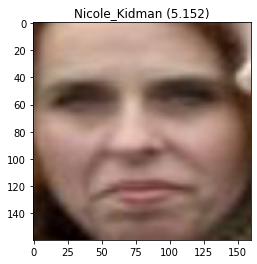

Predicted: Harrison_Ford (19.758)
Expected: Harrison_Ford


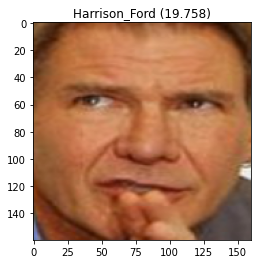

Predicted: Andy_Roddick (19.856)
Expected: Andy_Roddick


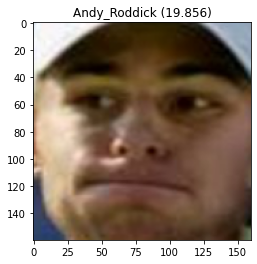

Predicted: Lleyton_Hewitt (42.179)
Expected: Lleyton_Hewitt


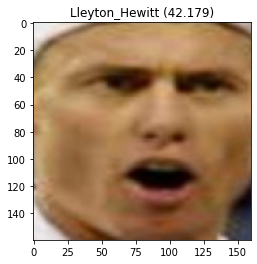

Predicted: John_Ashcroft (20.033)
Expected: Mahathir_Mohamad


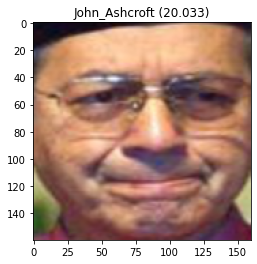

Predicted: David_Beckham (30.146)
Expected: David_Beckham


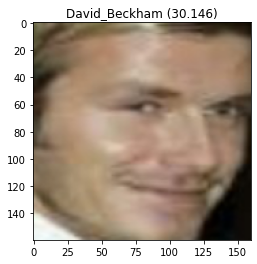

Predicted: Tom_Ridge (48.249)
Expected: Tom_Ridge


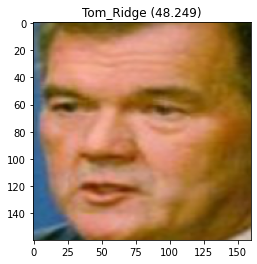

Predicted: Jacques_Chirac (58.050)
Expected: Jacques_Chirac


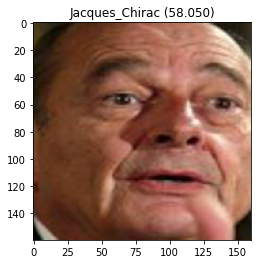

Predicted: Jacques_Chirac (50.471)
Expected: Jacques_Chirac


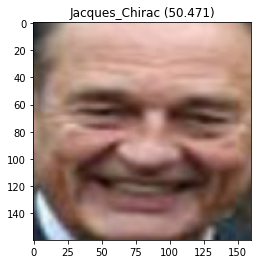

Predicted: Mahathir_Mohamad (14.274)
Expected: Mahathir_Mohamad


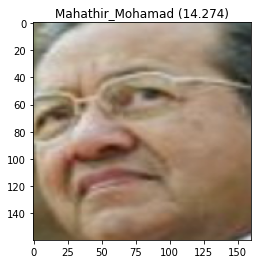

Predicted: Andy_Roddick (25.212)
Expected: Andy_Roddick


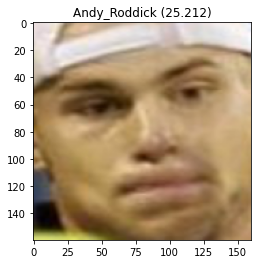

Predicted: Megawati_Sukarnoputri (29.689)
Expected: Megawati_Sukarnoputri


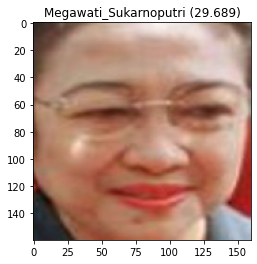

Predicted: John_Ashcroft (60.081)
Expected: John_Ashcroft


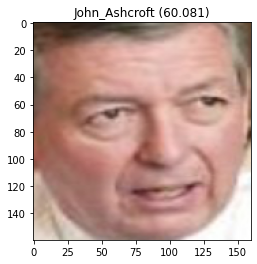

Predicted: David_Beckham (30.146)
Expected: David_Beckham


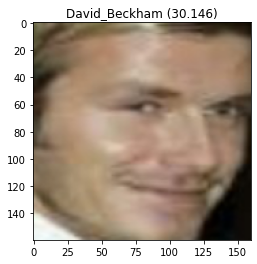

Predicted: John_Negroponte (12.387)
Expected: John_Negroponte


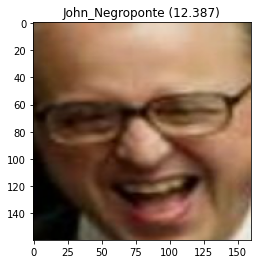

In [35]:
from random import choice
for i in range(15):
    # select a random face from test set
    selection = choice([i for i in range(valid.shape[0])]) 
    random_face = valid[selection]
    random_face_emd = embValid_norm[selection]
    random_face_class = y_valid_enc[selection]
    random_face_name = out_encoder.inverse_transform([random_face_class])
    # prediction for the face
    samples = np.expand_dims(random_face_emd, axis=0)
    yhat_class = model.predict(samples)
    yhat_prob = model.predict_proba(samples)
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class) #print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    #if random_face_name[0] == predict_names[0]:
    print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    print('Expected: %s' % random_face_name[0])
    # plot face
    plt.imshow(random_face)
    title = '%s (%.3f)' % (predict_names[0], class_probability)
    plt.title(title)
    plt.show()

Predicted: Jackie_Chan (4.642)
Expected: Jackie_Chan


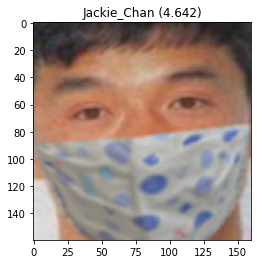

Predicted: Bill_Clinton (17.639)
Expected: Bill_Clinton


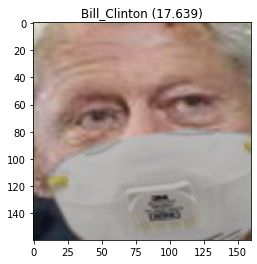

Predicted: Andy_Roddick (11.196)
Expected: Andy_Roddick


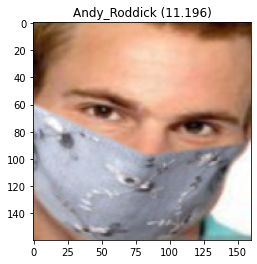

Predicted: Winona_Ryder (8.832)
Expected: David_Beckham


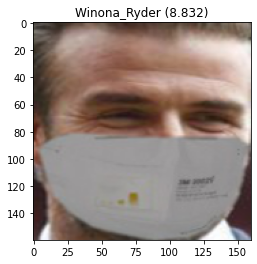

Predicted: Winona_Ryder (8.323)
Expected: Hillary_Clinton


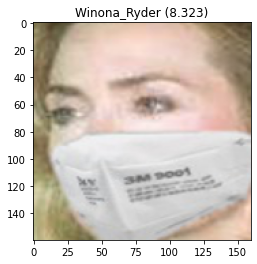

Predicted: Lance_Armstrong (8.694)
Expected: Lance_Armstrong


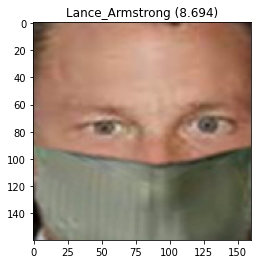

Predicted: Pierce_Brosnan (8.336)
Expected: Pierce_Brosnan


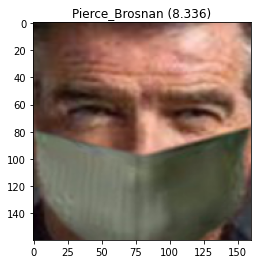

Predicted: Britney_Spears (11.082)
Expected: Britney_Spears


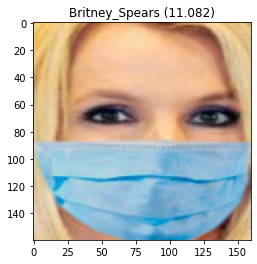

Predicted: Winona_Ryder (31.113)
Expected: Andy_Roddick


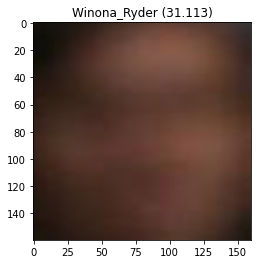

Predicted: Lleyton_Hewitt (16.942)
Expected: Andy_Roddick


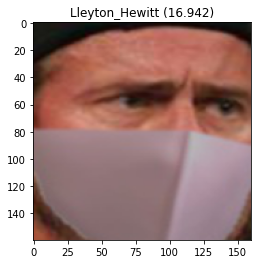

Predicted: Lance_Armstrong (6.852)
Expected: Lance_Armstrong


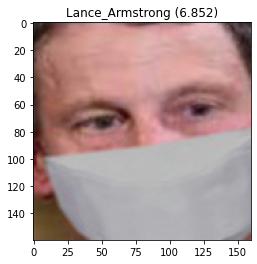

Predicted: Lance_Armstrong (8.694)
Expected: Lance_Armstrong


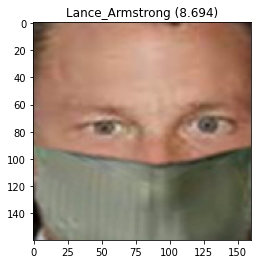

Predicted: Nestor_Kirchner (15.995)
Expected: Nestor_Kirchner


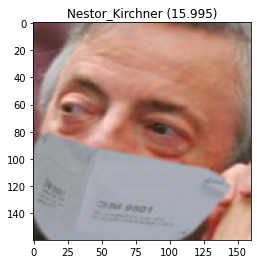

Predicted: Halle_Berry (4.430)
Expected: Halle_Berry


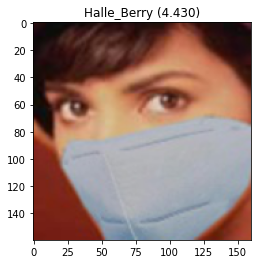

Predicted: Andre_Agassi (7.453)
Expected: Andre_Agassi


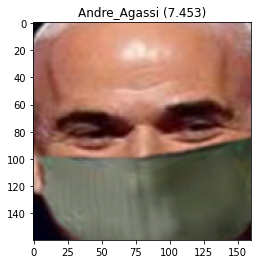

In [36]:
from random import choice
for i in range(15):
    # select a random face from test set
    selection = choice([i for i in range(testX.shape[0])]) 
    random_face = testX[selection]
    random_face_emd = emdTestX_norm[selection]
    random_face_class = testy_enc[selection]
    random_face_name = out_encoder.inverse_transform([random_face_class])
    # prediction for the face
    samples = np.expand_dims(random_face_emd, axis=0)
    yhat_class = model.predict(samples)
    yhat_prob = model.predict_proba(samples)
    class_index = yhat_class[0]
    if class_index <= 75:
        # get name
        class_probability = yhat_prob[0,class_index] * 100
        predict_names = out_encoder.inverse_transform(yhat_class) #print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
        #if random_face_name[0] == predict_names[0]:
        print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
        print('Expected: %s' % random_face_name[0])
        # plot face
        plt.imshow(random_face)
        title = '%s (%.3f)' % (predict_names[0], class_probability)
        plt.title(title)
        plt.show()

Use Case : Detection and Recognition of Multiple Faces within same image

In [37]:
def load_multiface(dir):
    X = []
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path,'test')
        X.extend(face)
    print('Total number of faces found is',len(X))
    return np.asarray(X)

In [38]:
#multi_testx = load_multiface('../input/use-case/Multiple/')
multi_testx = load_multiface('/content/Multiple/')
print(multi_testx.shape)

Total number of faces found is 14
(14, 160, 160, 3)


In [39]:
daily_emb = list()
for face in multi_testx:
    emd = get_embedding(facenet_model, face)
    daily_emb.append(emd)
daily_emb = np.asarray(daily_emb)
print(daily_emb.shape)

(14, 128)


In [40]:
daily_emb_norm = in_encoder.transform(daily_emb)
yhat_test = model.predict(daily_emb_norm)
pred_names = out_encoder.inverse_transform(yhat_test)
predict_names = list(set(pred_names))
predict_names.sort()
print(predict_names)

['Angelina_Jolie', 'Arnold_Schwarzenegger', 'David_Beckham', 'Jackie_Chan', 'Nicole_Kidman', 'Salma_Hayek', 'Serena_Williams', 'Tom_Cruise', 'Tom_Hanks', 'Venus_Williams', 'Winona_Ryder']


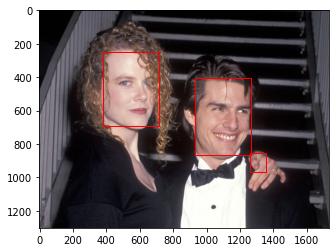

['Tom_Cruise' 'Nicole_Kidman' 'Winona_Ryder']


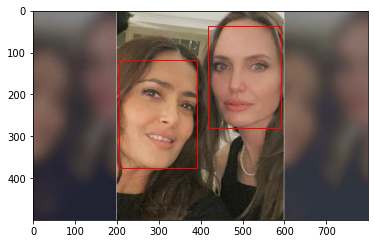

['Salma_Hayek' 'Angelina_Jolie']


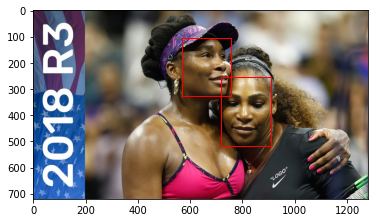

['Serena_Williams' 'Venus_Williams']


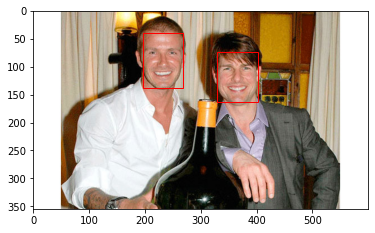

['David_Beckham' 'Tom_Cruise']


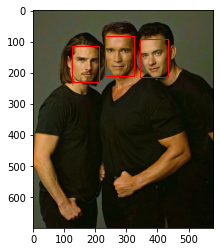

['Arnold_Schwarzenegger' 'Tom_Hanks' 'Tom_Cruise']


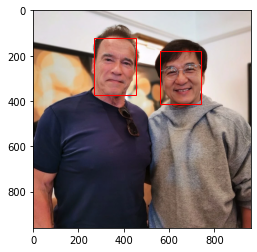

['Arnold_Schwarzenegger' 'Jackie_Chan']


In [41]:
#dir = '../input/use-case/Multiple/'
dir = '/content/Multiple/'
for filename in os.listdir(dir):
        path = dir + filename
        draw_facebox(path,'test')
        faces = extract_face(path,'test')
        emd_list = []
        for face in faces:
            emd = get_embedding(facenet_model, face)
            emd_list.append(emd)
        emb_array = np.asarray(emd_list)
        emb_norm = in_encoder.transform(emb_array)
        yhat_test = model.predict(emb_norm)
        pred_name = out_encoder.inverse_transform(yhat_test)
        print(pred_name)

In [42]:
cur_date = str(date.today()) + '.xlsx'
print(cur_date)

2022-03-30.xlsx


In [43]:
student_names = list(set(trainy))
student_names.sort()
print(student_names)

['Andre_Agassi', 'Andy_Roddick', 'Angelina_Jolie', 'Arnold_Schwarzenegger', 'Atal_Bihari_Vajpayee', 'Bill_Clinton', 'Bill_Gates', 'Britney_Spears', 'Charles_Moose', 'David_Beckham', 'Dick_Cheney', 'George_HW_Bush', 'Halle_Berry', 'Harrison_Ford', 'Hillary_Clinton', 'Jackie_Chan', 'Jacques_Chirac', 'James_Blake', 'Jean_Charest', 'Jennifer_Aniston', 'Jennifer_Garner', 'John_Ashcroft', 'John_Negroponte', 'Lance_Armstrong', 'Lleyton_Hewitt', 'Lucio_Gutierrez', 'Mahathir_Mohamad', 'Mark_Philippoussis', 'Megawati_Sukarnoputri', 'Michael_Jackson', 'Michael_Schumacher', 'Mohammad_Khatami', 'Muhammad_Ali', 'Nestor_Kirchner', 'Nicole_Kidman', 'Paul_Wolfowitz', 'Pierce_Brosnan', 'Richard_Gephardt', 'Roger_Federer', 'Roh_Moo-hyun', 'Salma_Hayek', 'Serena_Williams', 'Tiger_Woods', 'Tim_Henman', 'Tom_Cruise', 'Tom_Hanks', 'Tom_Ridge', 'Trent_Lott', 'Venus_Williams', 'Vladimir_Putin', 'Winona_Ryder', 'Yoriko_Kawaguchi']


In [44]:
present = []
for i in range(len(student_names)):
    if student_names[i] in predict_names:
        present.append('Present')
    else:
        present.append('Absent')

In [45]:
excel_list = list(zip(student_names,present))
df = pd.DataFrame(excel_list,columns = ['Student Name','Attendance'])
writer = pd.ExcelWriter(cur_date, engine='xlsxwriter')
df.to_excel(writer, sheet_name=cur_date, index=False)
writer.save()